In [187]:
import pandas as pd
import numpy as np

In [188]:
data=pd.read_csv("../Baseball_Data/baseball_ref_data.csv")
data

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Fernando Abad*\abadfe01,30.0,TOT,AL,57,1,1,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0,1
1,2,Jose Abreu\abreujo02,29.0,CHW,AL,159,695,624,67,183,...,0.468,0.820,125.0,292,21,15,0,9,7,*3/D
2,3,A.J. Achter\achteaj01,27.0,LAA,AL,27,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
3,4,Dustin Ackley*\ackledu01,28.0,NYY,AL,28,70,61,6,9,...,0.148,0.390,9.0,9,0,0,0,1,0,3/9D4
4,5,Cristhian Adames#\adamecr01,24.0,COL,NL,121,256,225,25,49,...,0.302,0.607,53.0,68,5,4,3,0,0,645
5,6,Austin Adams\adamsau01,29.0,CLE,AL,19,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
6,7,Matt Adams*\adamsma01,27.0,STL,NL,118,327,297,37,74,...,0.471,0.780,106.0,140,5,2,0,3,1,3
7,8,Tim Adleman\adlemti01,28.0,CIN,NL,13,23,21,2,4,...,0.286,0.476,24.0,6,0,0,2,0,0,1
8,9,Ehire Adrianza#\adriaeh01,26.0,SFG,NL,40,71,63,3,16,...,0.381,0.679,82.0,24,0,2,4,0,0,6/45
9,10,Jesus Aguilar\aguilje01,26.0,CLE,AL,9,6,6,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0,/3D


In [189]:
#Removing players with fewer than 50 at bats
data=data[data['AB']>75]

#Scaling these columns by PA
columns_to_be_scaled=['R', 'H', '2B', '3B', 'HR', 'RBI','SB', 'CS', 'BB', 'SO', 
                      'IBB', 'HBP', 'SH', 'SF', 'GDP', 'TB']
for j in columns_to_be_scaled:
    data.ix[:,j]=data.ix[:,j]/data.ix[:,'PA']
#Making the index the name of the player
data=data.set_index(data['Name'])
#Removing these columns
remove=['Rk', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'Pos Summary', 'Name']
for i in remove:
    data.drop(i, axis=1, inplace=True)
data.drop('LgAvg per 600 PA', axis=0)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
Name,,,,,,,,,,,,,,,,,,,,,
Jose Abreu\abreujo02,0.096403,0.263309,0.046043,0.001439,0.035971,0.143885,0.000000,0.002878,0.067626,0.179856,...,0.353,0.468,0.820,125.0,0.420144,0.030216,0.021583,0.000000,0.012950,0.010072
Cristhian Adames#\adamecr01,0.097656,0.191406,0.027344,0.011719,0.007812,0.066406,0.007812,0.011719,0.093750,0.183594,...,0.304,0.302,0.607,53.0,0.265625,0.019531,0.015625,0.011719,0.000000,0.000000
Matt Adams*\adamsma01,0.113150,0.226300,0.055046,0.000000,0.048930,0.165138,0.000000,0.003058,0.076453,0.247706,...,0.309,0.471,0.780,106.0,0.428135,0.015291,0.006116,0.000000,0.009174,0.003058
Nick Ahmed\ahmedni01,0.084416,0.201299,0.029221,0.003247,0.012987,0.064935,0.016234,0.006494,0.048701,0.188312,...,0.265,0.299,0.564,46.0,0.275974,0.029221,0.012987,0.006494,0.009740,0.009740
Abraham Almonte#\almonab01,0.123711,0.247423,0.103093,0.005155,0.005155,0.113402,0.041237,0.000000,0.041237,0.216495,...,0.294,0.401,0.695,78.0,0.376289,0.025773,0.005155,0.000000,0.015464,0.005155
Albert Almora\almoral01,0.119658,0.264957,0.076923,0.008547,0.025641,0.119658,0.000000,0.000000,0.042735,0.170940,...,0.308,0.455,0.763,103.0,0.435897,0.042735,0.000000,0.000000,0.000000,0.000000
Yonder Alonso*\alonsyo01,0.097744,0.229323,0.063910,0.000000,0.013158,0.105263,0.005639,0.001880,0.084586,0.139098,...,0.316,0.367,0.683,91.0,0.332707,0.028195,0.001880,0.000000,0.007519,0.001880
Aaron Altherr\altheaa01,0.101322,0.171806,0.026432,0.000000,0.017621,0.096916,0.030837,0.008811,0.101322,0.303965,...,0.300,0.288,0.587,60.0,0.251101,0.017621,0.026432,0.000000,0.000000,0.008811
Jose Altuve\altuvjo01,0.150628,0.301255,0.058577,0.006974,0.033473,0.133891,0.041841,0.013947,0.083682,0.097629,...,0.396,0.531,0.928,156.0,0.474198,0.020921,0.009763,0.004184,0.009763,0.015342


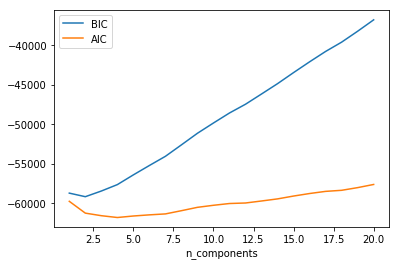

In [190]:
data.fillna(0, inplace=True)
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]
plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

In [191]:
#Let's use 4 clusters
clustering_model=models[3]
predicted_probs=clustering_model.predict_proba(data).round(3)

In [192]:
predicted_probs=pd.DataFrame(predicted_probs)
predicted_probs=predicted_probs.set_index(data.index)
predicted_probs['Player']=predicted_probs.index

In [193]:
for i in range(len(predicted_probs)-1):
    predicted_probs.iloc[i,4]=predicted_probs.iloc[i,4].split("\\")[1]

In [194]:
predicted_probs=predicted_probs.set_index(predicted_probs['Player'])
predicted_probs.drop('Player', inplace=True, axis=1)

In [195]:
#predicted_probs=predicted_probs.drop('LgAvg per 600 PA')

In [196]:
del predicted_probs.index.name

In [197]:
predicted_probs['Type']=clustering_model.predict(data)

In [199]:
predicted_probs.to_csv("../Baseball_Data/predicted_player_types.csv")